In [1]:
# Import Libraries

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Creating dataframes for spotify charts for the countries below

df_india = pd.read_csv ('/Users/aayushmakharia/Desktop/untitled folder 2/india.csv')
df_unitedstates = pd.read_csv ('/Users/aayushmakharia/Desktop/untitled folder 2/united_states.csv')
df_unitedkingdom = pd.read_csv ('/Users/aayushmakharia/Desktop/untitled folder 2/united_kingdom.csv')

In [3]:
# Dataframe of India

df_india.head(5)
df_india["Streams"] = df_india["Streams"].str.replace(',', '').astype(float)

In [4]:
# Dataframe of United States

df_unitedstates.head(5)
df_unitedstates["Streams"] = df_unitedstates["Streams"].str.replace(',', '').astype(float)

In [5]:
# Dataframe of United Kingdom

df_unitedkingdom.head(5)
df_unitedkingdom["Streams"] = df_unitedkingdom["Streams"].str.replace(',', '').astype(float)

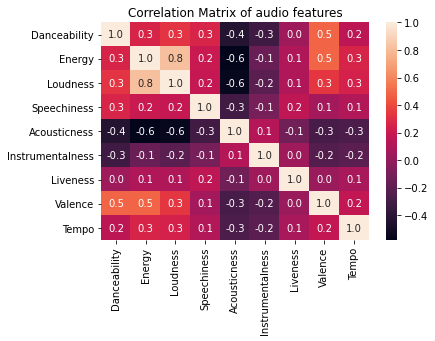

In [6]:
# Correlation matrix of audio features of the songs collected
# Strength of linear association between audio features

df_temp = df_india.append(df_unitedstates).reset_index(drop=True)
df_combined = df_temp.append(df_unitedkingdom).reset_index(drop=True)
df_combined.drop_duplicates(subset=["Song"], inplace=True)

df_audio = df_combined[['Danceability', 'Energy', 'Loudness', 
                        'Speechiness', 'Acousticness',
                        'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]

df_audio.corr()
sn.heatmap(df_audio.corr(), annot=True, fmt=".1f")
plt.title('Correlation Matrix of audio features')
plt.show()

In [7]:
# Lockdown phase in USA
# Music analysis

df_unitedkingdom['Date'] = pd.to_datetime(df_unitedkingdom['Date'])

start_date = '03-25-20'
end_date = '05-21-20'

date_mask = (df_unitedkingdom['Date'] >= start_date) & (df_unitedkingdom['Date'] <= end_date)

df_unitedkingdom_lockdown = df_unitedkingdom.loc[date_mask]

Song
Blinding Lights                      565152.0
Toosie Slide                         503672.0
Roses - Imanbek Remix                476646.0
THE SCOTTS                           411770.0
Don't Start Now                      403927.0
Pain 1993 (with Playboi Carti)       392331.0
Stuck with U (with Justin Bieber)    385825.0
Break My Heart                       356463.0
The Box                              355808.0
Chicago Freestyle (feat. Giveon)     347878.0
Name: Streams, dtype: float64


<ipython-input-8-c225f8aa4369>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unitedkingdom_temp.drop_duplicates(subset = ["Song"], inplace=True)


<AxesSubplot:title={'center':'Top 10 Streamed Songs in UK during the Lockdown Phase'}, xlabel='Streams in Millions', ylabel='Song'>

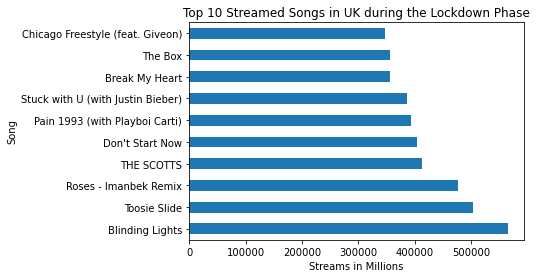

In [8]:
# Top 10 Streamed Songs in USA during the lockdown

df_unitedkingdom_temp = df_unitedkingdom_lockdown
df_unitedkingdom_temp.drop_duplicates(subset = ["Song"], inplace=True)
df_stream_unitedkingdom = df_unitedkingdom_temp.groupby(['Song'])['Streams'].sum().nlargest(10)

print(df_stream_unitedkingdom)

plt.title("Top 10 Streamed Songs in UK during the Lockdown Phase")
plt.ylabel("Song")
plt.xlabel("Streams in Millions")
df_stream_unitedkingdom.plot.barh()

In [9]:
# Analysing the above songs

df_audio_valence = df_unitedkingdom_temp[['Song','Streams','Valence', 'Genre', 'Artist']]

df_audio_valence['Sentiment'] = df_audio_valence['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')
df_audio_valence

<ipython-input-9-7c6f22f8d24c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audio_valence['Sentiment'] = df_audio_valence['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')


Song   Streams  Valence  \
120                      Blinding Lights  565152.0   0.3340   
121                Roses - Imanbek Remix  476646.0   0.8980   
122                              The Box  355808.0   0.6420   
123                               Say So  280000.0   0.7860   
124                             Physical  267486.0   0.7460   
132                      Don't Start Now  403927.0   0.6790   
134                       Break My Heart  356463.0   0.4670   
166                         Toosie Slide  503672.0   0.8370   
179                      Blueberry Faygo  307220.0   0.3490   
219     death bed (coffee for your head)  262431.0   0.3480   
273                           THE SCOTTS  411770.0   0.2800   
293  Houdini (feat. Swarmz & Tion Wayne)  298889.0   0.7040   
307       Pain 1993 (with Playboi Carti)  392331.0   0.1200   
309     Chicago Freestyle (feat. Giveon)  347878.0   0.0397   
319         ROCKSTAR (feat. Roddy Ricch)  238108.0   0.4970   
344    Stuck with U (with Justin Bieber)  385825.0   0.5370   
354                                GOOBA  257152.0   0.3930   
399                    Rover (feat. DTG)  275944.0   0.8040   

                                                 Genre  \
120  ['canadian contemporary r&b', 'canadian pop', ...   
121               ['melodic rap', 'rap', 'slap house']   
122                     ['melodic rap', 'rap', 'trap']   
123                    ['dance pop', 'pop', 'pop rap']   
124                     ['dance pop', 'pop', 'uk pop']   
132                     ['dance pop', 'pop', 'uk pop']   
134                     ['dance pop', 'pop', 'uk pop']   
166  ['canadian hip hop', 'canadian pop', 'hip hop'...   
179  ['melodic rap', 'rap', 'rap conscient', 'trap'...   
219                             ['emo rap', 'sad rap']   
273                                                 []   
293                                     ['uk hip hop']   
307  ['canadian hip hop', 'canadian pop', 'hip hop'...   
309  ['canadian hip hop', 'canadian pop', 'hip hop'...   
319                  ['north carolina hip hop', 'rap']   
344                           ['pop', 'post-teen pop']   
354                                        ['emo rap']   
399                                      ['afroswing']   

                                 Artist Sentiment  
120                          The Weeknd       Sad  
121                           SAINt JHN     Happy  
122                         Roddy Ricch     Happy  
123                            Doja Cat     Happy  
124                            Dua Lipa     Happy  
132                            Dua Lipa     Happy  
134                            Dua Lipa     Happy  
166                               Drake     Happy  
179                           Lil Mosey       Sad  
219                  Powfu, beabadoobee       Sad  
273  THE SCOTTS, Travis Scott, Kid Cudi       Sad  
293                                 KSI     Happy  
307                               Drake       Sad  
309                               Drake       Sad  
319                              DaBaby     Happy  
344                       Ariana Grande     Happy  
354                             6ix9ine       Sad  
399                               S1mba     Happy

Average Streams (%) of Sad/Happy songs in Lockdown(UK)


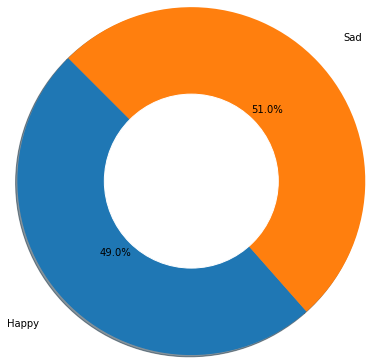

In [10]:
df_stream_unitedkingdom_sent = df_audio_valence.groupby(['Sentiment'])['Streams'].mean()

sent = ['Happy', 'Sad']
print("Average Streams (%) of Sad/Happy songs in Lockdown(UK)")


explode = (0.0, 0.0) 
plt.pie(df_stream_unitedkingdom_sent, labels = sent, labeldistance=1.2, explode = explode,autopct='%.1f%%', radius = 2, shadow = True, startangle=135)
my_circle=plt.Circle((0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [11]:
start_date1 = '05-22-20'
end_date1 = '07-31-20'

date_mask1 = (df_unitedkingdom['Date'] >= start_date1) & (df_unitedkingdom['Date'] <= end_date1)
df_unitedkingdom_lockdown1 = df_unitedkingdom.loc[date_mask1]
df_unitedkingdom_lockdown1.head(20)

Song      Artist       Date   Streams  \
410         ROCKSTAR (feat. Roddy Ricch)      DaBaby 2020-05-22  505233.0   
411      Rain On Me (with Ariana Grande)   Lady Gaga 2020-05-22  472715.0   
412                   Cap (feat. Offset)         KSI 2020-05-22  375746.0   
413                      Blinding Lights  The Weeknd 2020-05-22  366782.0   
414  Houdini (feat. Swarmz & Tion Wayne)         KSI 2020-05-22  344344.0   
415         ROCKSTAR (feat. Roddy Ricch)      DaBaby 2020-05-23  482066.0   
416      Rain On Me (with Ariana Grande)   Lady Gaga 2020-05-23  420242.0   
417                      Blinding Lights  The Weeknd 2020-05-23  360738.0   
418                         Toosie Slide       Drake 2020-05-23  302546.0   
419                Roses - Imanbek Remix   SAINt JHN 2020-05-23  294982.0   
420         ROCKSTAR (feat. Roddy Ricch)      DaBaby 2020-05-24  479136.0   
421      Rain On Me (with Ariana Grande)   Lady Gaga 2020-05-24  392112.0   
422                      Blinding Lights  The Weeknd 2020-05-24  354524.0   
423                         Toosie Slide       Drake 2020-05-24  294708.0   
424                Roses - Imanbek Remix   SAINt JHN 2020-05-24  287524.0   
425         ROCKSTAR (feat. Roddy Ricch)      DaBaby 2020-05-25  531891.0   
426      Rain On Me (with Ariana Grande)   Lady Gaga 2020-05-25  418987.0   
427                      Blinding Lights  The Weeknd 2020-05-25  415759.0   
428                Roses - Imanbek Remix   SAINt JHN 2020-05-25  351687.0   
429                         Toosie Slide       Drake 2020-05-25  342850.0   

     Rank Country                                              Links  \
410     1      gb  https://open.spotify.com/track/7ytR5pFWmSjzHJI...   
411     2      gb  https://open.spotify.com/track/24ySl2hOPGCDcxB...   
412     3      gb  https://open.spotify.com/track/3xcgXaHFeoCs0xT...   
413     4      gb  https://open.spotify.com/track/0VjIjW4GlUZAMYd...   
414     5      gb  https://open.spotify.com/track/1iTBugGyk1aif7L...   
415     1      gb  https://open.spotify.com/track/7ytR5pFWmSjzHJI...   
416     2      gb  https://open.spotify.com/track/24ySl2hOPGCDcxB...   
417     3      gb  https://open.spotify.com/track/0VjIjW4GlUZAMYd...   
418     4      gb  https://open.spotify.com/track/466cKvZn1j45Ipx...   
419     5      gb  https://open.spotify.com/track/24Yi9hE78yPEbZ4...   
420     1      gb  https://open.spotify.com/track/7ytR5pFWmSjzHJI...   
421     2      gb  https://open.spotify.com/track/24ySl2hOPGCDcxB...   
422     3      gb  https://open.spotify.com/track/0VjIjW4GlUZAMYd...   
423     4      gb  https://open.spotify.com/track/466cKvZn1j45Ipx...   
424     5      gb  https://open.spotify.com/track/24Yi9hE78yPEbZ4...   
425     1      gb  https://open.spotify.com/track/7ytR5pFWmSjzHJI...   
426     2      gb  https://open.spotify.com/track/24ySl2hOPGCDcxB...   
427     3      gb  https://open.spotify.com/track/0VjIjW4GlUZAMYd...   
428     4      gb  https://open.spotify.com/track/24Yi9hE78yPEbZ4...   
429     5      gb  https://open.spotify.com/track/466cKvZn1j45Ipx...   

     Danceability  Energy  Loudness  Speechiness  Acousticness  \
410         0.746   0.690    -7.956       0.1640      0.247000   
411         0.672   0.855    -3.764       0.0397      0.021000   
412         0.756   0.652    -7.617       0.1130      0.208000   
413         0.514   0.730    -5.934       0.0598      0.001460   
414         0.549   0.522    -8.471       0.2190      0.000286   
415         0.746   0.690    -7.956       0.1640      0.247000   
416         0.672   0.855    -3.764       0.0397      0.021000   
417         0.514   0.730    -5.934       0.0598      0.001460   
418         0.830   0.490    -8.820       0.2090      0.289000   
419         0.770   0.724    -5.484       0.0495      0.016700   
420         0.746   0.690    -7.956       0.1640      0.247000   
421         0.672   0.855    -3.764       0.0397      0.021000   
422         0.514   0.730    -5.934       0.059

<ipython-input-12-e9ec96711196>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unitedkingdom_temp1.drop_duplicates(subset = ["Song"], inplace=True)


Song
Only You Freestyle                 590271.0
cardigan                           506167.0
ROCKSTAR (feat. Roddy Ricch)       505233.0
the 1                              476532.0
Rain On Me (with Ariana Grande)    472715.0
exile (feat. Bon Iver)             461418.0
Come & Go (with Marshmello)        394434.0
Life's A Mess (feat. Halsey)       381040.0
Cap (feat. Offset)                 375746.0
Conversations                      368062.0
Name: Streams, dtype: float64


<AxesSubplot:title={'center':'Top 10 Streamed Songs in UK during the Post-Lockdown Phase'}, xlabel='Streams in Millions', ylabel='Song'>

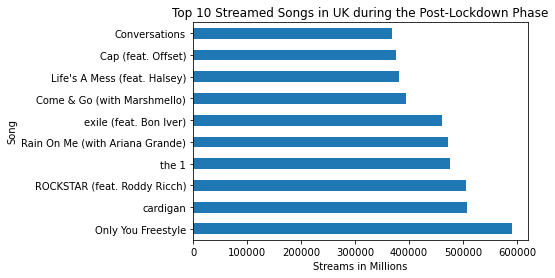

In [12]:
df_unitedkingdom_temp1 = df_unitedkingdom_lockdown1
df_unitedkingdom_temp1.drop_duplicates(subset = ["Song"], inplace=True)
df_stream_unitedkingdom1 = df_unitedkingdom_temp1.groupby(['Song'])['Streams'].sum().nlargest(10)

print(df_stream_unitedkingdom1)

plt.title("Top 10 Streamed Songs in UK during the Post-Lockdown Phase")
plt.ylabel("Song")
plt.xlabel("Streams in Millions")
df_stream_unitedkingdom1.plot.barh()

In [13]:
df_audio_valence1 = df_unitedkingdom_temp1[['Song','Streams','Valence', 'Genre', 'Artist']]
df_audio_valence1['Sentiment'] = df_audio_valence1['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')
df_audio_valence1

<ipython-input-13-8fac01dcbfee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audio_valence1['Sentiment'] = df_audio_valence1['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')


Song   Streams  Valence  \
410           ROCKSTAR (feat. Roddy Ricch)  505233.0    0.497   
411        Rain On Me (with Ariana Grande)  472715.0    0.646   
412                     Cap (feat. Offset)  375746.0    0.787   
413                        Blinding Lights  366782.0    0.334   
414    Houdini (feat. Swarmz & Tion Wayne)  344344.0    0.708   
418                           Toosie Slide  302546.0    0.845   
419                  Roses - Imanbek Remix  294982.0    0.898   
449            Sour Candy (with BLACKPINK)  353281.0    0.784   
474                      Rover (feat. DTG)  259479.0    0.804   
534                            Breaking Me  269909.0    0.664   
583       Savage Love (Laxed - Siren Beat)  351849.0    0.761   
589                       Watermelon Sugar  339632.0    0.557   
623                               West Ten  333554.0    0.845   
624  The Woo (feat. 50 Cent & Roddy Ricch)  332039.0    0.286   
657            Come & Go (with Marshmello)  394434.0    0.535   
658           Life's A Mess (feat. Halsey)  381040.0    0.177   
659                          Conversations  368062.0    0.570   
674              Head & Heart (feat. MNEK)  290496.0    0.905   
710                     Only You Freestyle  590271.0    0.804   
726                               cardigan  506167.0    0.551   
727                                  the 1  476532.0    0.172   
728                 exile (feat. Bon Iver)  461418.0    0.152   
753                    Lighter (feat. KSI)  327876.0    0.356   

                                                 Genre  \
410                  ['north carolina hip hop', 'rap']   
411              ['dance pop', 'pop', 'post-teen pop']   
412                                     ['uk hip hop']   
413  ['canadian contemporary r&b', 'canadian pop', ...   
414                                     ['uk hip hop']   
418  ['canadian hip hop', 'canadian pop', 'hip hop'...   
419               ['melodic rap', 'rap', 'slap house']   
449              ['dance pop', 'pop', 'post-teen pop']   
474                                      ['afroswing']   
534  ['dance pop', 'edm', 'german dance', 'pop danc...   
583                                         ['nz pop']   
589                           ['pop', 'post-teen pop']   
623             ['grime', 'uk hip hop', 'ukg revival']   
624                                 ['brooklyn drill']   
657                     ['chicago rap', 'melodic rap']   
658                     ['chicago rap', 'melodic rap']   
659                     ['chicago rap', 'melodic rap']   
674  ['dance pop', 'edm', 'house', 'pop dance', 'tr...   
710                                     ['uk hip hop']   
726                           ['pop', 'post-teen pop']   
727                           ['pop', 'post-teen pop']   
728                           ['pop', 'post-teen pop']   
753  ['dance pop', 'house', 'pop dance', 'post-teen...   

                      Artist Sentiment  
410                   DaBaby     Happy  
411                Lady Gaga     Happy  
412                      KSI     Happy  
413               The Weeknd       Sad  
414                      KSI     Happy  
418                    Drake     Happy  
419                SAINt JHN     Happy  
449                Lady Gaga     Happy  
474                    S1mba     Happy  
534               Topic, A7S     Happy  
583  Jawsh 685, Jason Derulo     Happy  
589             Harry Styles     Happy  
623         AJ Tracey, Mabel     Happy  
624                Pop Smoke       Sad  
657               Juice WRLD     Happy  
658               Juice WRLD       Sad  
659               Juice WRLD     Happy  
674               Joel Corry     Happy  
710        Headie One, Drake     Happy  
726             Taylor Swift     Happy  
727             Taylor Swift       Sad  
728             Taylor Swift       Sad  
753              Nathan Dawe       Sad

Average Streams (%) of Sad/Happy songs in Post-Lockdown(UK)


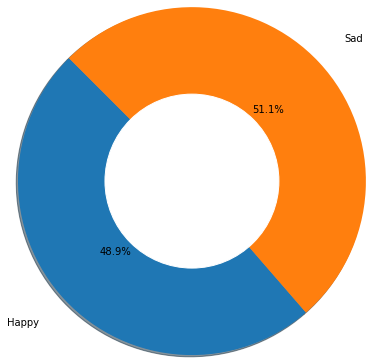

In [14]:
df_stream_unitedkingdom_sent1 = df_audio_valence1.groupby(['Sentiment'])['Streams'].mean()

sent1 = ['Happy', 'Sad']

print("Average Streams (%) of Sad/Happy songs in Post-Lockdown(UK)")
explode = (0.0, 0.0) 
plt.pie(df_stream_unitedkingdom_sent1, labels = sent1, labeldistance=1.2, explode = explode,autopct='%.1f%%', radius = 2, shadow = True, startangle=135)
my_circle=plt.Circle((0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [15]:
start_date2 = '03-25-20'
end_date2 = '05-21-20'

date_mask2 = (df_unitedkingdom['Date'] >= start_date2) & (df_unitedkingdom['Date'] <= end_date2)
df_unitedkingdom_lockdown2 = df_unitedkingdom.loc[date_mask2]

In [16]:
df_unitedkingdom_lockdown2.drop_duplicates(subset = ["Song"], inplace=True)

df_audio_valence2 = df_unitedkingdom_lockdown2[['Song','Streams','Valence', 'Genre', 'Artist']]
df_audio_valence2['Sentiment'] = df_audio_valence2['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')

df_happy = df_audio_valence2.loc[df_audio_valence2['Sentiment'] == 'Happy']
df_sad = df_audio_valence2.loc[df_audio_valence2['Sentiment'] == 'Sad']

<ipython-input-16-822f11c61898>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unitedkingdom_lockdown2.drop_duplicates(subset = ["Song"], inplace=True)
<ipython-input-16-822f11c61898>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audio_valence2['Sentiment'] = df_audio_valence2['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')


Artist with Highest Sad Stream vs Artist with Highest Happy Stream Lockdown(UK)


<AxesSubplot:xlabel='Artist', ylabel='Streams'>

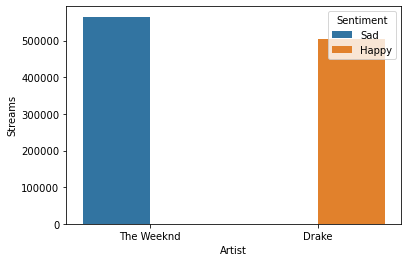

In [17]:
df_sadplt = df_sad.sort_values(by = 'Streams', ascending = False).head(1)
df_happyplt = df_happy.sort_values(by = 'Streams', ascending = False).head(1)
print("Artist with Highest Sad Stream vs Artist with Highest Happy Stream Lockdown(UK)")

result = df_sadplt.append(df_happyplt).reset_index(drop=True)
result["Artist"]
sns.barplot(x="Artist", y="Streams", data=result, hue="Sentiment")

In [18]:
start_date3 = '05-21-20'
end_date3 = '07-31-20'

date_mask3 = (df_unitedkingdom['Date'] >= start_date3) & (df_unitedkingdom['Date'] <= end_date3)
df_unitedkingdom_lockdown3 = df_unitedkingdom.loc[date_mask3]

In [19]:
df_unitedkingdom_lockdown3.drop_duplicates(subset = ["Song"], inplace=True)

df_audio_valence3 = df_unitedkingdom_lockdown3[['Song','Streams','Valence', 'Genre', 'Artist']]
df_audio_valence3['Sentiment'] = df_audio_valence3['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')

df_happy1 = df_audio_valence3.loc[df_audio_valence3['Sentiment'] == 'Happy']
df_sad1 = df_audio_valence3.loc[df_audio_valence3['Sentiment'] == 'Sad']

<ipython-input-19-6993566c0895>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unitedkingdom_lockdown3.drop_duplicates(subset = ["Song"], inplace=True)
<ipython-input-19-6993566c0895>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_audio_valence3['Sentiment'] = df_audio_valence3['Valence'].map(lambda x:'Sad' if x<0.4 else 'Happy')


Artist with Highest Sad Stream vs Artist with Highest Happy Stream Post-Lockdown(UK)


<AxesSubplot:xlabel='Artist', ylabel='Streams'>

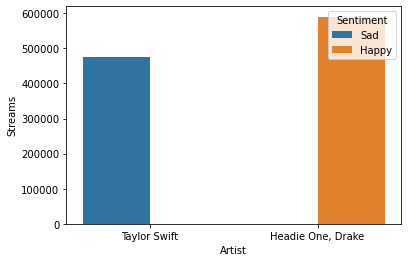

In [20]:

df_sadplt1 = df_sad1.sort_values(by = 'Streams', ascending = False).head(1)
df_happyplt1 = df_happy1.sort_values(by = 'Streams', ascending = False).head(1)
print("Artist with Highest Sad Stream vs Artist with Highest Happy Stream Post-Lockdown(UK)")

result1 = df_sadplt1.append(df_happyplt1).reset_index(drop=True)
result1["Artist"]
sns.barplot(x="Artist", y="Streams", data=result1, hue="Sentiment")

In [21]:
# Kmeans

df_unitedkingdom_cluster = df_unitedkingdom.copy()
X = df_unitedkingdom_cluster.iloc[:, [7,8,9,10,11,12,13,14,15]].values

In [22]:
print(X.shape)

(765, 9)


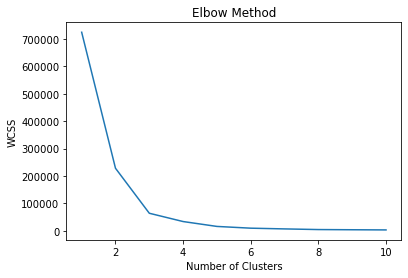

In [23]:
# finding out the proper number of clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 765, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
#Taking 5 clusters

scaleVar = MinMaxScaler()
scaledVar = scaleVar.fit_transform(X)

#Kmeans 5 clusters according to elbow

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 765, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaledVar)

In [25]:
# pred values 
y_kmeans

array([2, 3, 0, 1, 0, 2, 3, 0, 1, 0, 2, 3, 0, 1, 0, 2, 3, 0, 0, 1, 2, 3,
       0, 1, 1, 2, 0, 3, 0, 0, 2, 3, 0, 0, 1, 2, 3, 0, 0, 1, 2, 0, 0, 3,
       1, 2, 0, 0, 3, 0, 2, 0, 3, 0, 1, 2, 0, 3, 0, 1, 2, 0, 3, 0, 0, 2,
       3, 0, 0, 1, 2, 3, 0, 0, 1, 2, 0, 3, 0, 0, 2, 0, 3, 0, 1, 2, 0, 3,
       0, 1, 2, 0, 3, 0, 1, 2, 0, 3, 1, 0, 2, 0, 3, 0, 1, 2, 0, 3, 1, 1,
       2, 0, 3, 1, 0, 2, 0, 3, 1, 0, 2, 0, 3, 1, 0, 2, 0, 3, 1, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 0, 3, 2, 0, 0, 0, 3, 2, 0, 0, 0,
       3, 2, 0, 0, 0, 3, 2, 0, 0, 0, 3, 2, 4, 0, 0, 0, 2, 4, 0, 0, 0, 2,
       4, 0, 0, 1, 4, 2, 0, 1, 3, 2, 4, 0, 1, 3, 2, 4, 0, 1, 3, 4, 2, 0,
       1, 3, 2, 4, 0, 1, 1, 2, 4, 0, 1, 1, 2, 4, 0, 1, 1, 4, 2, 0, 1, 3,
       4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 4, 2, 0, 1, 3, 2, 4, 0, 1, 3, 2, 4,
       0, 1, 3, 2, 4, 0, 1, 3, 2, 4, 0, 1, 3, 2, 4, 0, 1, 3, 2, 4, 0, 1,
       3, 2, 4, 0, 1, 3, 2, 0, 4, 1, 1, 2, 0, 4, 1, 1, 2, 0, 4, 1, 1, 2,
       4, 0, 1, 1, 2, 4, 0, 4, 1, 2, 4, 0, 4, 1, 2,

In [26]:
# converting preditcions into a df
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['K-Means Cluster']

In [27]:
df_unitedkingdom_cluster = pd.concat([df_unitedkingdom_cluster, kmeans], axis=1)
df_unitedkingdom_cluster.head(5)

Song         Artist       Date   Streams  Rank Country  \
0        Blinding Lights     The Weeknd 2020-03-01  439557.0     1      gb   
1                The Box    Roddy Ricch 2020-03-01  401034.0     2      gb   
2  Roses - Imanbek Remix      SAINt JHN 2020-03-01  342579.0     3      gb   
3         No Time To Die  Billie Eilish 2020-03-01  309990.0     4      gb   
4        Don't Start Now       Dua Lipa 2020-03-01  292161.0     5      gb   

                                               Links  Danceability  Energy  \
0  https://open.spotify.com/track/0sf12qNH5qcw8qp...         0.513   0.796   
1  https://open.spotify.com/track/0nbXyq5TXYPCO7p...         0.896   0.586   
2  https://open.spotify.com/track/24Yi9hE78yPEbZ4...         0.770   0.724   
3  https://open.spotify.com/track/73SpzrcaHk0RQPF...         0.380   0.219   
4  https://open.spotify.com/track/6WrI0LAC5M1Rw2M...         0.794   0.793   

   Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
0    -4.075       0.0629       0.00147          0.000209    0.0938   0.3450   
1    -6.687       0.0559       0.10400          0.000000    0.7900   0.6420   
2    -5.484       0.0495       0.01670          0.010700    0.3530   0.8980   
3   -13.273       0.0358       0.91700          0.010400    0.0827   0.0517   
4    -4.521       0.0842       0.01250          0.000000    0.0952   0.6770   

     Tempo                                              Genre  K-Means Cluster  
0  171.017  ['canadian contemporary r&b', 'canadian pop', ...                2  
1  116.971                     ['melodic rap', 'rap', 'trap']                3  
2  121.975               ['melodic rap', 'rap', 'slap house']                0  
3   73.537                              ['electropop', 'pop']                1  
4  123.941                     ['dance pop', 'pop', 'uk pop']                0

In [28]:
# Songs in part of cluster 0
df_0_cluster = df_unitedkingdom_cluster.loc[df_unitedkingdom_cluster['K-Means Cluster'] == 0]
df_0_cluster.drop_duplicates(subset=['Song']).head(5)

Song                       Artist       Date  \
2       Roses - Imanbek Remix                    SAINt JHN 2020-03-01   
4             Don't Start Now                     Dua Lipa 2020-03-01   
26                       Rain  Aitch, AJ Tracey, Tay Keith 2020-03-06   
29   Intentions (feat. Quavo)                Justin Bieber 2020-03-06   
119                  Physical                     Dua Lipa 2020-03-24   

      Streams  Rank Country  \
2    342579.0     3      gb   
4    292161.0     5      gb   
26   497950.0     2      gb   
29   316192.0     5      gb   
119  249866.0     5      gb   

                                                 Links  Danceability  Energy  \
2    https://open.spotify.com/track/24Yi9hE78yPEbZ4...         0.770   0.724   
4    https://open.spotify.com/track/6WrI0LAC5M1Rw2M...         0.794   0.793   
26   https://open.spotify.com/track/5LBikzSkad9yQ6R...         0.871   0.870   
29   https://open.spotify.com/track/4umIPjkehX1r7uh...         0.806   0.546   
119  https://open.spotify.com/track/5px6upUHM3fhOP6...         0.647   0.844   

     Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
2      -5.484       0.0495        0.0167          0.010700    0.3530    0.898   
4      -4.521       0.0842        0.0125          0.000000    0.0952    0.677   
26     -4.797       0.2020        0.0262          0.000002    0.1090    0.830   
29     -6.637       0.0575        0.3000          0.000000    0.1020    0.874   
119    -3.756       0.0457        0.0137          0.000658    0.1020    0.746   

       Tempo                                     Genre  K-Means Cluster  
2    121.975      ['melodic rap', 'rap', 'slap house']                0  
4    123.941            ['dance pop', 'pop', 'uk pop']                0  
26   150.147     ['dance pop', 'pop', 'post-teen pop']                0  
29   147.986  ['canadian pop', 'pop', 'post-teen pop']                0  
119  146.962            ['dance pop', 'pop', 'uk pop']                0

In [29]:
# Songs in part of cluster 1
df_1_cluster = df_unitedkingdom_cluster.loc[df_unitedkingdom_cluster['K-Means Cluster'] == 1]
df_1_cluster.drop_duplicates(subset=['Song']).head(5)

Song         Artist       Date   Streams  Rank Country  \
3   No Time To Die  Billie Eilish 2020-03-01  309990.0     4      gb   
24   Before You Go  Lewis Capaldi 2020-03-05  293009.0     5      gb   
34    Dance Monkey    Tones And I 2020-03-07  319354.0     5      gb   
44          Say So       Doja Cat 2020-03-09  278620.0     5      gb   
98     Alone Again     The Weeknd 2020-03-20  315959.0     4      gb   

                                                Links  Danceability  Energy  \
3   https://open.spotify.com/track/73SpzrcaHk0RQPF...         0.380   0.219   
24  https://open.spotify.com/track/2gMXnyrvIjhVBUZ...         0.459   0.575   
34  https://open.spotify.com/track/1rgnBhdG2JDFTbY...         0.825   0.593   
44  https://open.spotify.com/track/3Dv1eDb0MEgF93G...         0.787   0.673   
98  https://open.spotify.com/track/6b5P51m8xx2XA6U...         0.218   0.652   

    Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
3    -13.273       0.0358         0.917          0.010400    0.0827   0.0517   
24    -4.858       0.0573         0.604          0.000000    0.0885   0.1830   
34    -6.401       0.0988         0.688          0.000161    0.1700   0.5400   
44    -4.577       0.1580         0.256          0.000004    0.0904   0.7860   
98    -7.953       0.0641         0.033          0.111000    0.1720   0.0599   

      Tempo                                              Genre  \
3    73.537                              ['electropop', 'pop']   
24  111.881                                  ['pop', 'uk pop']   
34   98.078                          ['australian pop', 'pop']   
44  110.962                    ['dance pop', 'pop', 'pop rap']   
98   65.375  ['canadian contemporary r&b', 'canadian pop', ...   

    K-Means Cluster  
3                 1  
24                1  
34                1  
44                1  
98                1

In [30]:
# Songs in part of cluster 2
df_2_cluster = df_unitedkingdom_cluster.loc[df_unitedkingdom_cluster['K-Means Cluster'] == 2]
df_2_cluster.drop_duplicates(subset=['Song']).head(5)

Song      Artist       Date   Streams  Rank  \
0                 Blinding Lights  The Weeknd 2020-03-01  439557.0     1   
354                         GOOBA     6ix9ine 2020-05-10  257152.0     5   
657   Come & Go (with Marshmello)  Juice WRLD 2020-07-10  394434.0     3   
658  Life's A Mess (feat. Halsey)  Juice WRLD 2020-07-10  381040.0     4   
659                 Conversations  Juice WRLD 2020-07-10  368062.0     5   

    Country                                              Links  Danceability  \
0        gb  https://open.spotify.com/track/0sf12qNH5qcw8qp...         0.513   
354      gb  https://open.spotify.com/track/4NhDYoQTYCdWHTv...         0.611   
657      gb  https://open.spotify.com/track/7y7w4tl4MaRC2UM...         0.625   
658      gb  https://open.spotify.com/track/4h5N4KyWZMtpeH9...         0.630   
659      gb  https://open.spotify.com/track/2fZTS0VboxRpF0F...         0.747   

     Energy  Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  \
0     0.796    -4.075       0.0629       0.00147          0.000209    0.0938   
354   0.688    -5.688       0.3410       0.02640          0.000000    0.2510   
657   0.814    -5.181       0.0657       0.01720          0.000000    0.1580   
658   0.446    -8.900       0.0351       0.33700          0.000000    0.1660   
659   0.622    -5.825       0.0838       0.17600          0.000000    0.1510   

     Valence    Tempo                                              Genre  \
0      0.345  171.017  ['canadian contemporary r&b', 'canadian pop', ...   
354    0.393  178.462                                        ['emo rap']   
657    0.535  144.991                     ['chicago rap', 'melodic rap']   
658    0.177  143.078                     ['chicago rap', 'melodic rap']   
659    0.570  159.930                     ['chicago rap', 'melodic rap']   

     K-Means Cluster  
0                  2  
354                2  
657                2  
658                2  
659                2

In [31]:
# Songs in part of cluster 3
df_3_cluster = df_unitedkingdom_cluster.loc[df_unitedkingdom_cluster['K-Means Cluster'] == 3]
df_3_cluster.drop_duplicates(subset=['Song']).head(5)

Song                   Artist       Date  \
1                              The Box              Roddy Ricch 2020-03-01   
219   death bed (coffee for your head)       Powfu, beabadoobee 2020-04-13   
344  Stuck with U (with Justin Bieber)            Ariana Grande 2020-05-08   
583   Savage Love (Laxed - Siren Beat)  Jawsh 685, Jason Derulo 2020-06-25   
726                           cardigan             Taylor Swift 2020-07-24   

      Streams  Rank Country  \
1    401034.0     2      gb   
219  262431.0     5      gb   
344  385825.0     5      gb   
583  351849.0     4      gb   
726  506167.0     2      gb   

                                                 Links  Danceability  Energy  \
1    https://open.spotify.com/track/0nbXyq5TXYPCO7p...         0.896   0.586   
219  https://open.spotify.com/track/7eJMfftS33KTjuF...         0.726   0.431   
344  https://open.spotify.com/track/4HBZA5flZLE435Q...         0.597   0.450   
583  https://open.spotify.com/track/1xQ6trAsedVPCdb...         0.767   0.481   
726  https://open.spotify.com/track/4LEK9rD7TWIG4FC...         0.613   0.581   

     Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
1      -6.687       0.0559         0.104          0.000000     0.790    0.642   
219    -8.765       0.1350         0.731          0.000000     0.696    0.348   
344    -6.658       0.0418         0.223          0.000000     0.382    0.537   
583    -8.520       0.0803         0.234          0.000000     0.269    0.761   
726    -8.588       0.0424         0.537          0.000345     0.250    0.551   

       Tempo                           Genre  K-Means Cluster  
1    116.971  ['melodic rap', 'rap', 'trap']                3  
219  144.026          ['emo rap', 'sad rap']                3  
344  178.765        ['pop', 'post-teen pop']                3  
583  150.076                      ['nz pop']                3  
726  130.033        ['pop', 'post-teen pop']                3

In [32]:
# Songs in part of cluster 4
df_4_cluster = df_unitedkingdom_cluster.loc[df_unitedkingdom_cluster['K-Means Cluster'] == 4]
df_4_cluster.drop_duplicates(subset=['Song']).head(5)

Song Artist       Date   Streams  Rank  \
166                         Toosie Slide  Drake 2020-04-03  503672.0     2   
293  Houdini (feat. Swarmz & Tion Wayne)    KSI 2020-04-28  298889.0     4   
399                    Rover (feat. DTG)  S1mba 2020-05-19  275944.0     5   

    Country                                              Links  Danceability  \
166      gb  https://open.spotify.com/track/127QTOFJsJQp5Lb...         0.834   
293      gb  https://open.spotify.com/track/3lay6f81Lhy0qp2...         0.572   
399      gb  https://open.spotify.com/track/4slSrbTK1sNK4I1...         0.613   

     Energy  Loudness  Speechiness  Acousticness  Instrumentalness  Liveness  \
166   0.454    -9.750        0.201      0.321000          0.000006     0.114   
293   0.519    -8.054        0.243      0.000415          0.000023     0.129   
399   0.624    -6.660        0.206      0.496000          0.000000     0.283   

     Valence    Tempo                                              Genre  \
166    0.837   81.618  ['canadian hip hop', 'canadian pop', 'hip hop'...   
293    0.704  100.453                                     ['uk hip hop']   
399    0.804   62.948                                      ['afroswing']   

     K-Means Cluster  
166                4  
293                4  
399                4

In [33]:
df_unitedkingdom_cluster.groupby("K-Means Cluster").describe()


Streams                                                    \
                  count           mean           std       min        25%   
K-Means Cluster                                                             
0                 239.0  371119.037657  79878.659900  249866.0  310636.50   
1                 198.0  376533.343434  89936.307668  238108.0  297211.00   
2                 129.0  421445.333333  91223.545875  257152.0  354524.00   
3                  99.0  360715.797980  59778.777604  249551.0  299280.00   
4                 100.0  364700.070000  93846.879872  248855.0  294245.75   

                                                Rank            ... Valence  \
                      50%       75%       max  count      mean  ...     75%   
K-Means Cluster                                                 ...           
0                347946.0  415182.0  727539.0  239.0  3.163180  ...   0.898   
1                351023.5  456790.5  596126.0  198.0  3.050505  ...   0.664   
2                407896.0  493706.0  637003.0  129.0  2.069767  ...   0.334   
3                369560.0  400944.0  506167.0   99.0  3.404040  ...   0.761   
4                337202.0  423900.0  606670.0  100.0  3.310000  ...   0.845   

                        Tempo                                           \
                   max  count        mean        std      min      25%   
K-Means Cluster                                                          
0                0.905  239.0  122.972192  13.307042   95.390  121.975   
1                0.804  198.0  101.812040  17.025668   65.375   89.977   
2                0.570  129.0  168.740760   8.882231  124.953  171.005   
3                0.761   99.0  136.444010  16.101327  116.971  116.971   
4                0.845  100.0   77.738440   9.426699   62.948   76.940   

                                            
                     50%      75%      max  
K-Means Cluster                             
0                121.975  123.056  150.147  
1                 98.078  110.962  146.950  
2                171.005  171.005  178.462  
3                144.026  150.076  178.765  
4                 81.604   81.618  104.509  

[5 rows x 88 columns]

In [34]:
df_unitedkingdom_cluster.groupby("K-Means Cluster")["Valence"].describe()


count      mean       std     min    25%    50%    75%    max
K-Means Cluster                                                               
0                239.0  0.778255  0.132394  0.4670  0.646  0.830  0.898  0.905
1                198.0  0.508485  0.171326  0.0397  0.497  0.497  0.664  0.804
2                129.0  0.345465  0.046445  0.1770  0.334  0.334  0.334  0.570
3                 99.0  0.623333  0.149666  0.3480  0.551  0.642  0.761  0.761
4                100.0  0.826910  0.030068  0.7040  0.804  0.837  0.845  0.845